In [1]:
import pandas as pd
student_scores_df = pd.read_csv(r'student_scores.csv')
student_scores_df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


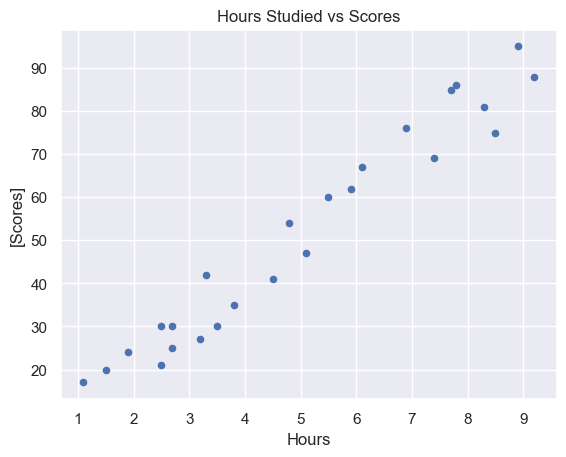

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots()
student_scores_df.plot(x="Hours", y=["Scores",], kind='scatter', ax=ax)
ax.set_title("Hours Studied vs Scores", wrap=True)
plt.ticklabel_format(axis="y", style="plain")

In [3]:
X = student_scores_df[["Hours"]]
y = student_scores_df["Scores"]

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split the data for the train and test
X_train, X_test, y_train,y_test = train_test_split(X,y,train_size=0.8, random_state=0)

In [5]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [12]:
# y_pred = lr.predict(X_test) 
test_df = pd.DataFrame({"Hours":[9]})
y_pred = lr.predict(test_df)
y_pred

array([91.21406837])

In [10]:
print("Intercept of the model:", lr.intercept_)
print("Coefficient fo the line:", lr.coef_)

Intercept of the model: 2.0181600414346974
Coefficient fo the line: [9.91065648]


In [11]:
X_test["Hours"].to_numpy()[:int(len(y_test))]

array([1.5, 3.2, 7.4, 2.5, 5.9])

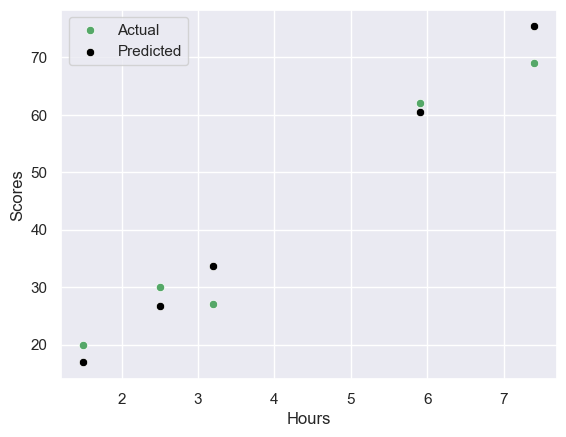

In [11]:
import seaborn as sns
fig, ax = plt.subplots()
sns.scatterplot(x=X_test['Hours'], y=y_test, ax=ax, label="Actual",color="g" )
sns.scatterplot(x=X_test['Hours'], y=y_pred, ax=ax, label="Predicted",color="black")
plt.ticklabel_format(axis="y", style="plain")

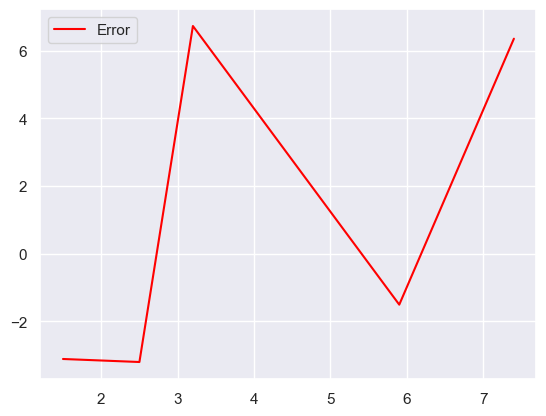

In [13]:

fig, ax = plt.subplots()
error = [y_pred[i] - (y_test.to_numpy())[i] for i in range(len(y_test))]
sns.lineplot(x=X_test['Hours'].to_numpy(), y=error,ax=ax, label="Error", color="red")
plt.ticklabel_format(axis="y", style="plain")

In [14]:
import numpy as np
from sklearn import metrics
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error", metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Mean Squared Error", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error 21.598769307217406
Root Mean Mean Squared Error 4.647447612100367


In [ ]:
print('r square:',metrics.r2_score(y_test,y_pred))
# The r Square equals 0.945 which indicates a good fit of the model to the data

r square: 0.9454906892105355


In [16]:
features = pd.DataFrame(lr.coef_, X.columns, columns=["coefficient"])
features

,coefficient
Hours,9.910656
